# Human Activity Recognition

### Objective
The main objective of this project is to build a model that predicts the human activities such as Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing or Laying.

### Dataset Information
The dataset is collected from 30 volunteers within an age group of 19-48 years wearing a smartphone on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz is captured. Further, the video was recorded to label the data manually.

The sensors (accelerometer and gyroscope) signal were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlabping (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was seperated using a Butterworth Low-Pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequncy domain. <a href="https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones#">[1]</a>

The body linear acceleration and angular velocity were derived in time to obtain jerk signals <strong>(tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ)</strong>.

The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names: <strong>tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag)</strong>.

Frequency domain signals from some of the available signals are obtained applying a Fast Fourier Transform (FFT). These signals objtained were labeled with prefix <strong>'f'</strong> as <strong> fBodyAcc-XYZ, fBodyGyroMag...</strong>

 We will estimate the following properties on each and every signal that we recoreded so far.

* ___mean()___: Mean value
* ___std()___: Standard deviation
* ___mad()___: Median absolute deviation 
* ___max()___: Largest value in array
* ___min()___: Smallest value in array
* ___sma()___: Signal magnitude area
* ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
* ___iqr()___: Interquartile range 
* ___entropy()___: Signal entropy
* ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
* ___correlation()___: correlation coefficient between two signals
* ___maxInds()___: index of the frequency component with largest magnitude
* ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
* ___skewness()___: skewness of the frequency domain signal 
* ___kurtosis()___: kurtosis of the frequency domain signal 
* ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
* ___angle()___: Angle between to vectors.
    

A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen <a href="https://www.youtube.com/watch?v=XOEN9W05_4A">here.</a>

### Label Encodings
* WALKING as 1
* WALKING_UPSTAIRS as 2
* WALKING_DOWNSTAIRS as 3
* SITTING as 4
* STANDING as 5
* LAYING as 6


In [78]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [79]:
# get the features from the file features.txt
features = []
with open('dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print(f"No of Features: {len(features)}")

No of Features: 561


### Obtain the train data

In [91]:
# get the data from txt files to pandas dataframe
X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('dataset/train/y_train.txt', names=['activity'], squeeze=True)
y_train_labels = y_train.map(
    {
        1 : 'WALKING',
        2 : 'WALKING_UPSTAIRS',
        3 : 'WALKING_DOWNSTAIRS',
        4 : 'SITTING',
        5 : 'STANDING',
        6 : 'LAYING'
    }
)

# combine all columns in single pandas dataframe
train = X_train
train['activity'] = y_train
train['activityName'] = y_train_labels
print(f"The Shape of trainig data is: {train.shape}")
train.sample()

The Shape of trainig data is: (7352, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity,activityName
1306,0.206812,0.027124,-0.085256,-0.084002,0.21038,-0.406156,-0.135402,0.108583,-0.412447,0.022748,...,0.582161,-0.318093,0.991457,0.618975,-0.632685,0.347809,0.063041,6,2,WALKING_UPSTAIRS


### Obtain the test data

In [92]:
# get the test data from txt file to pandas dataframe
X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = pd.DataFrame(data=features)

# add subject (person) column to dataframe
X_test['subject'] = pd.read_csv('dataset/test/subject_test.txt', header=None, squeeze=True)

# get labels from txt file
y_test = pd.read_csv('dataset/test/y_test.txt', names=['activity'], squeeze=True)
y_test_labels = y_test.map({
    1 : 'WALKING',
    2 : 'WALKING_UPSTAIRS',
    3 : 'WALKING_DOWNSTAIRS',
    4 : 'SITTING', 
    5 : 'STANDING',
    6 : 'LAYING'
})

# Combine all the columns to a single dataframe
test = X_test
test['activity'] = y_test
test['activityName'] = y_test_labels

print(f"The shape of test data is: {test.shape}")
test.sample()

The shape of test data is: (2947, 564)


,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)",subject,activity,activityName
1255,0.278964,-0.036612,-0.113213,-0.976533,-0.754065,-0.854484,-0.979384,-0.740275,-0.854264,-0.907082,...,0.011495,-0.103647,0.278913,0.021661,-0.934156,0.077862,-0.027654,12,4,SITTING


# Data Cleaning

### 1. Check for Duplicates

In [93]:
print(f"No of duplicates in Train Set: {sum(train.duplicated())}")
print(f"No of duplicates in Test Set: {sum(test.duplicated())}")

No of duplicates in Train Set: 0
No of duplicates in Test Set: 0


### 2. Checking for nan/Null values

In [94]:
print(f"There are {train.isnull().values.sum()} nan/null values in train set")
print(f"There are {test.isnull().values.sum()} nan/null values in test set")

There are 0 nan/null values in train set
There are 0 nan/null values in test set


### 3. Check for data imbalance

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

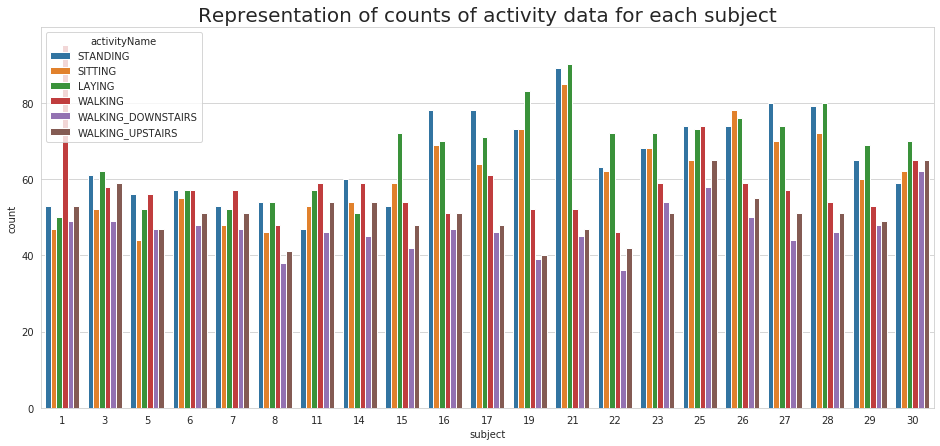

In [96]:
plt.figure(figsize=(16,7))
plt.title("Representation of counts of activity data for each subject", fontsize=20)
sns.countplot(x='subject', hue='activityName', data=train)
plt.show()

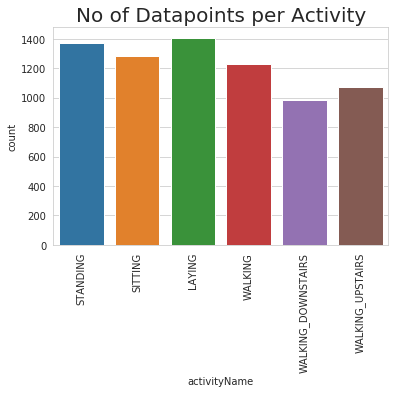

In [97]:
plt.title("No of Datapoints per Activity", fontsize=20)
sns.countplot(train.activityName)
plt.xticks(rotation=90)
plt.show()

### Observation:
> The data in Trainset is almost balanced.

### 4. Changing Feature names

In [100]:
columns = train.columns

# removing '()' from column names
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'activity', 'activityName'],
      dtype='object', length=564)

### 5. Save dataframe in a csv file

In [102]:
train.to_csv('dataset/csv/train.csv', index=False)
test.to_csv('dataset/csv/test.csv', index=False)

## Exploratory Data Analysis

#### "Without domain knowledge EDA has no meaning, without EDA a problem has no soul."

### 1. Featuring Engineering from  Domain Knowledge

* Static and Dynamic Activities
    * In static activities (Siting, standing, laying down) motion information will not be very useful.
    * In dynamic activities (Walking, Walking Upstairs, Walking Downstairs) motion will be significant

### 2. Stationary and Moving Activities are completely different


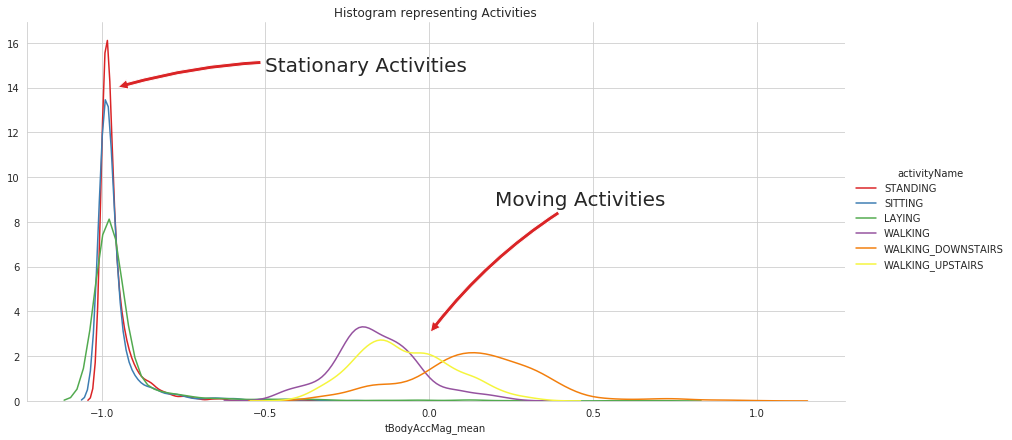

In [139]:
sns.set_palette("Set1", desat=0.90)

facetgrid = sns.FacetGrid(train, hue='activityName', size=6, aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMag_mean', hist=False).add_legend()
plt.title("Histogram representing Activities")
plt.annotate("Stationary Activities", 
             xy=(-0.956, 14), 
             xytext=(-0.5, 15), 
             size=20,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.annotate("Moving Activities", 
             xy=(0, 3), 
             xytext=(0.2, 9), 
             size=20,
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.show()

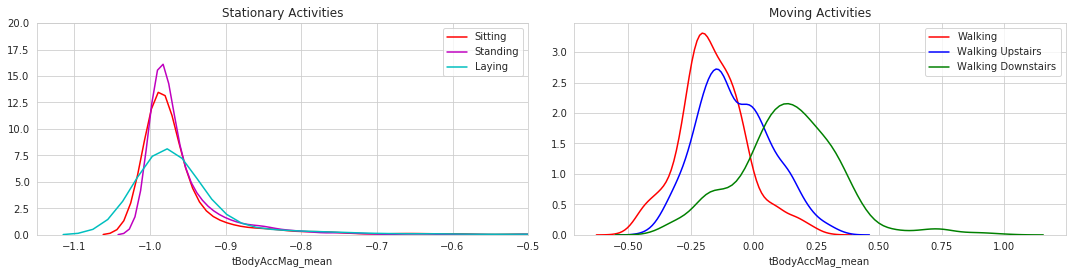

In [158]:
# ploting histogram for stationary and moving activities in seperate plot

walking_df = train[train['activity']==1]
walkingUpstairs_df = train[train['activity']==2]
walkingDownstairs_df = train[train['activity']==3]
sitting_df = train[train['activity']==4]
standing_df = train[train['activity']==5]
laying_df = train[train['activity']==6]

plt.figure(figsize=(15, 7))
# for Stationary Activities
plt.subplot(2, 2, 1)
plt.title('Stationary Activities')
sns.distplot(sitting_df['tBodyAccMag_mean'], color='r', hist=False, label = 'Sitting')
sns.distplot(standing_df['tBodyAccMag_mean'], color='m', hist=False, label = 'Standing')
sns.distplot(laying_df['tBodyAccMag_mean'], color='c', hist=False, label='Laying')
plt.axis([-1.15, -0.5, 0, 20])
plt.legend(loc='top')

# Subplot for moving activities
plt.subplot(2, 2, 2)
plt.title("Moving Activities")
sns.distplot(walking_df['tBodyAccMag_mean'], color='red', hist=False, label = 'Walking')
sns.distplot(walkingUpstairs_df['tBodyAccMag_mean'], color='blue', hist=False, label = 'Walking Upstairs')
sns.distplot(walkingDownstairs_df['tBodyAccMag_mean'], color='green', hist=False, label = 'Walking Downstairs')
plt.legend(loc='top')

plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can seperate it well

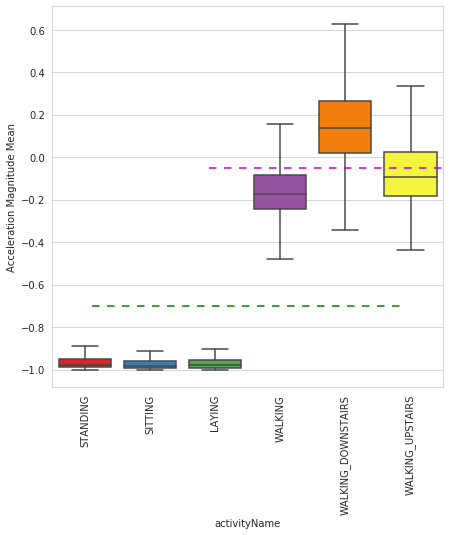

In [161]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activityName', y='tBodyAccMag_mean', data=train, showfliers=False, saturation=1)
plt.ylabel("Acceleration Magnitude Mean")
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

#### Observation:
* If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying
* If tAccMean is > -0.6 then the Activities are either Walking or Walking Upstairs or Walking Downstairs
* If tAccMean is > 0.0 then the Activity is WalkingDownstairs
* We can classify 75% Activity labels with some errors.

### 4. Position of GravityAccelerationComponents also matters

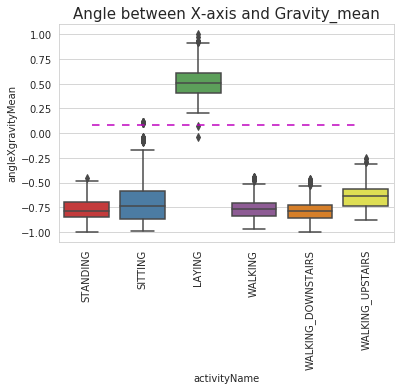

In [166]:
sns.boxplot(x='activityName', y='angleXgravityMean', data=train)
plt.title("Angle between X-axis and Gravity_mean", fontsize=15)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5,5))
plt.xticks(rotation=90)
plt.show()

### Observation:
* If angleX, gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to laying activity with just a single if else statement.

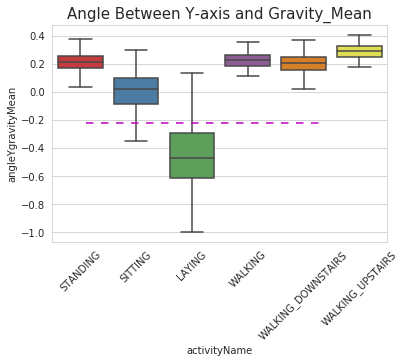

In [168]:
sns.boxplot(x='activityName', y='angleYgravityMean', data=train, showfliers=False)
plt.title('Angle Between Y-axis and Gravity_Mean', fontsize=15)
plt.xticks(rotation=45)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,5), c='m')
plt.show()

## Aplly t-distributed Stochastic Neighbor Embedding (t-SNE)

Here in this dataset there are 561 features for each sample. For this multi-dimensional data, we need to identify the hidden patterns, explore and analyze the dataset. And not just that, we have to find out if there is a pattern in the data -- is it signal or is it just noise? For solving this uncomfortable situation, we use t-SNE to explore a multidimensional dataset.

t-SNE is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in low-dimensional object by a two- or three-dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback-Leibler divergence(KL divergence) between the two distributions with respect to the locations of the points in the map. Note that, while the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate.

While t-SNE plots often seem to display clusters, the visual clusters can be influenced strongly by the chosen parameterization and therefore a good understanding of the parameters for t-SNE is necessary. Such "clusters" can be shown to even appear in non-clustered data. It has been demonstrated that t-SNE is often able to recover well-sepearated clusters, and with special parameter choices, approximates a simple form of spectral clustering.

#### What is dimensionality reduction?
In simple terms, dimensionality reduction is the technique of representing multi-dimensional data (data with multiple features having a correlation with each other) in 2 or 3 dimensions. So, with the help of dimensionality reduction algorithm, we will be able to present the data explicitly.

In [172]:
from sklearn.manifold import TSNE

In [175]:
# Perform t-sne with different perplexity values and their respective plots.
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    for index, perplexity in enumerate(perplexities):
        # perform t-SNE
        print(f"Performing t-SNE with perplexity {perplexities} and with {n_iter} iterations at max")
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('\n Done...')
        
        # Prepare the data for SeaBorn
        print('\n Creating plot for t-SNE visualization..')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label' : y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False,
                  size=8, palette='Set1', markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title(f"Perplexity: {perplexity} and max_iter: {n_iter}")
        img_name = img_name_prefix + '_prep_{}_iter_{}.png'.format(perplexity, n_iter)
        print("\n Saving this plot as image in present working Directory...")
        plt.savefig(img_name)
        plt.show()
        print('Done.')

Performing t-SNE with perplexity [2, 5, 10, 20, 50] and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.579s...
[t-SNE] Computed neighbors for 7352 samples in 42.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 124.7030640, gradient norm = 0.0286364 (50 iterations in 3.948s)
[t-SNE] Iteration 100: error = 107.2791748, gradient norm = 0.0289842 

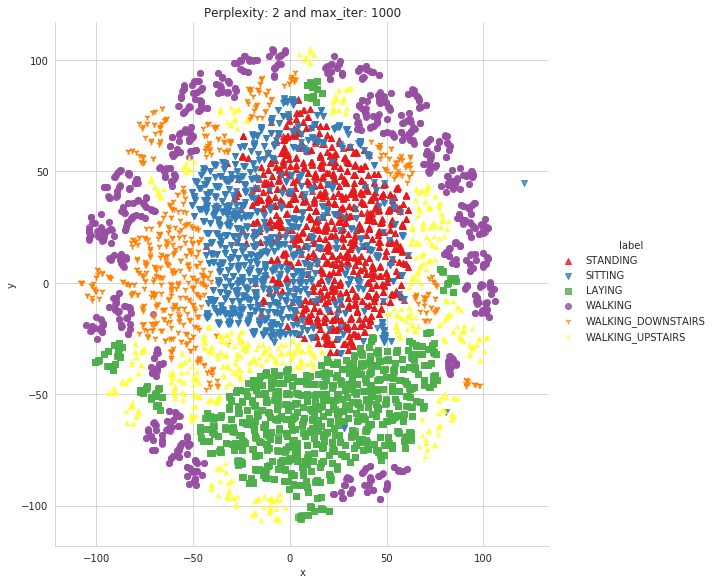

Done.
Performing t-SNE with perplexity [2, 5, 10, 20, 50] and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.597s...
[t-SNE] Computed neighbors for 7352 samples in 48.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.084s
[t-SNE] Iteration 50: error = 113.9409180, gradient norm = 0.0222798 (50 iterations in 3.480s)
[t-SNE] Iteration 100: error = 97.6331635, gradient norm = 0.01

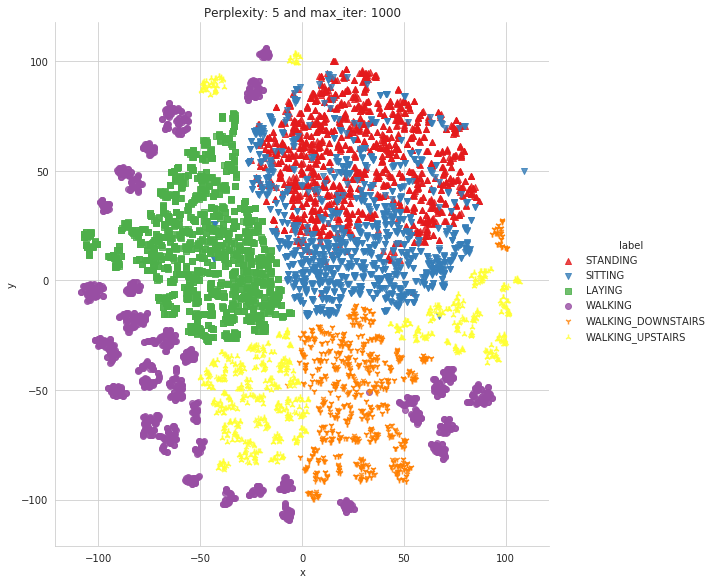

Done.
Performing t-SNE with perplexity [2, 5, 10, 20, 50] and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.816s...
[t-SNE] Computed neighbors for 7352 samples in 49.882s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.136s
[t-SNE] Iteration 50: error = 105.8629761, gradient norm = 0.0183083 (50 iterations in 2.400s)
[t-SNE] Iteration 100: error = 90.2498703, gradient norm = 0.00

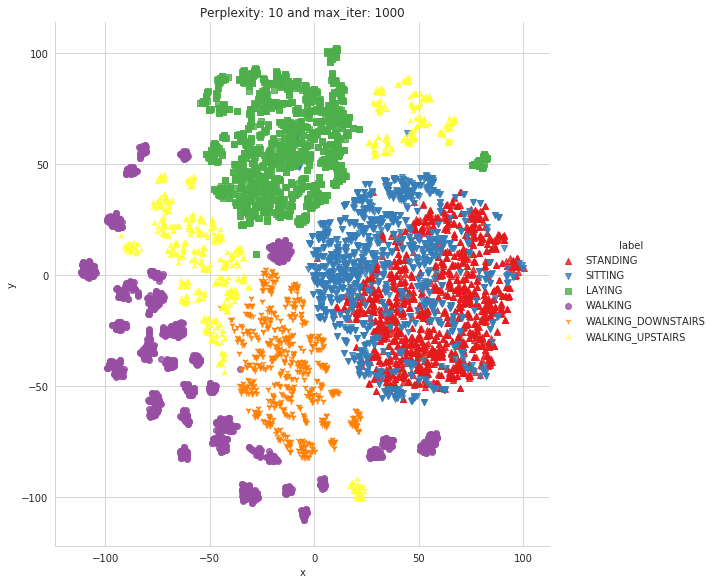

Done.
Performing t-SNE with perplexity [2, 5, 10, 20, 50] and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.576s...
[t-SNE] Computed neighbors for 7352 samples in 49.796s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.273s
[t-SNE] Iteration 50: error = 96.5574036, gradient norm = 0.0261998 (50 iterations in 3.145s)
[t-SNE] Iteration 100: error = 83.9941711, gradient norm = 0.008

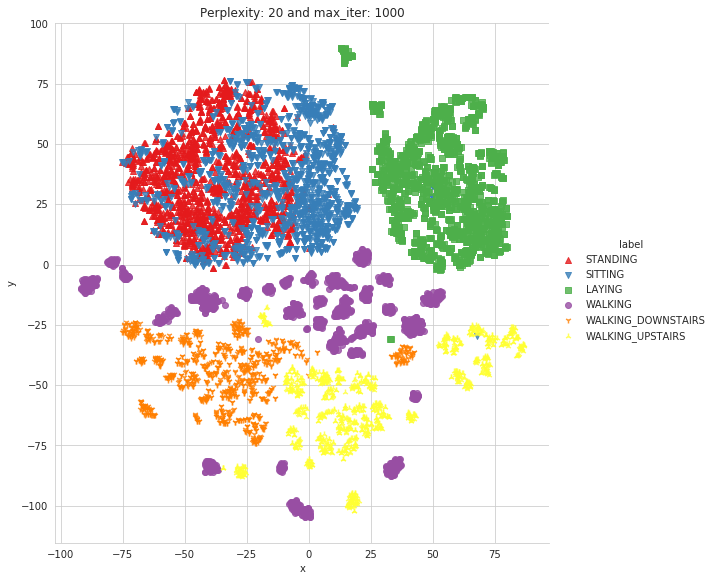

Done.
Performing t-SNE with perplexity [2, 5, 10, 20, 50] and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.570s...
[t-SNE] Computed neighbors for 7352 samples in 53.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.735s
[t-SNE] Iteration 50: error = 86.3105240, gradient norm = 0.0207073 (50 iterations in 4.677s)
[t-SNE] Iteration 100: error = 75.7665863, gradient norm = 0.00

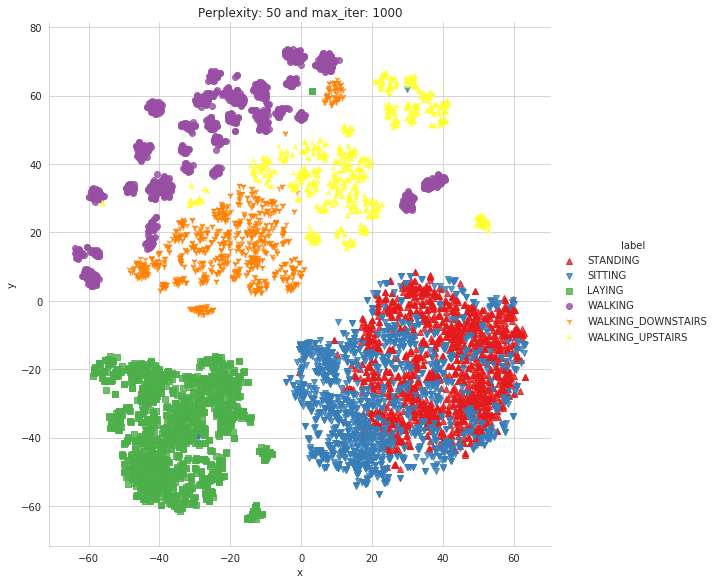

Done.


In [176]:
X_pre_tsne = train.drop(['subject', 'activity', 'activityName'], axis=1)
y_pre_tsne = train['activityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2,5,10,20,50])

Performing t-SNE with perplexity [20, 50, 90] and with 2000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.510s...
[t-SNE] Computed neighbors for 7352 samples in 46.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.280s
[t-SNE] Iteration 50: error = 97.7518387, gradient norm = 0.0153137 (50 iterations in 2.870s)
[t-SNE] Iteration 100: error = 83.8307266, gradient norm = 0.0061693 (50 ite

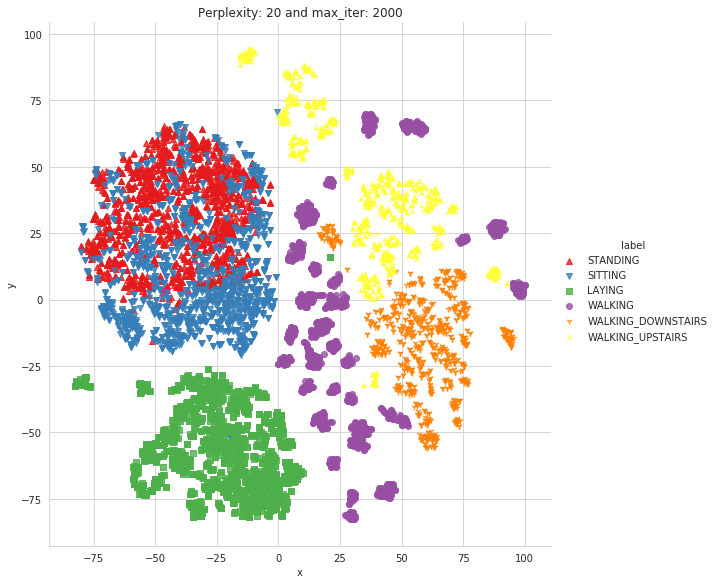

Done.
Performing t-SNE with perplexity [20, 50, 90] and with 2000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.488s...
[t-SNE] Computed neighbors for 7352 samples in 47.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.642s
[t-SNE] Iteration 50: error = 87.1658936, gradient norm = 0.0097627 (50 iterations in 3.304s)
[t-SNE] Iteration 100: error = 75.7117844, gradient norm = 0.0047299 

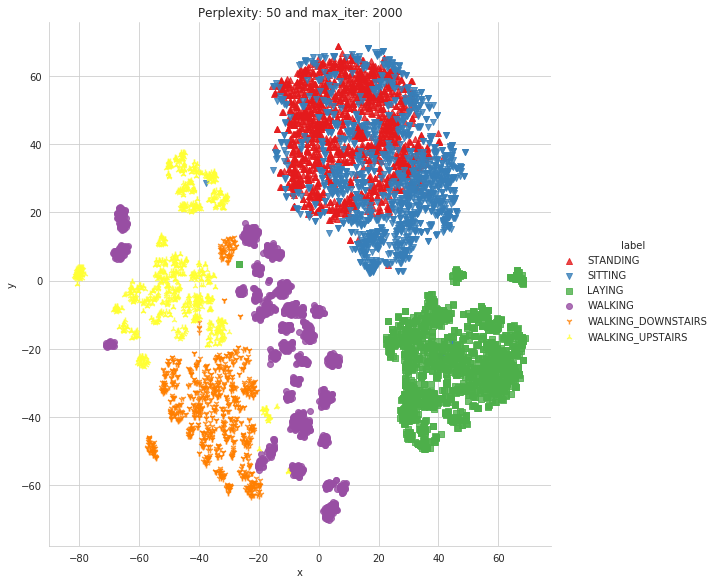

Done.
Performing t-SNE with perplexity [20, 50, 90] and with 2000 iterations at max
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.557s...
[t-SNE] Computed neighbors for 7352 samples in 51.891s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.540175
[t-SNE] Computed conditional probabilities in 1.152s
[t-SNE] Iteration 50: error = 77.5907440, gradient norm = 0.0364362 (50 iterations in 4.072s)
[t-SNE] Iteration 100: error = 69.6659470, gradient norm = 0.0029433 

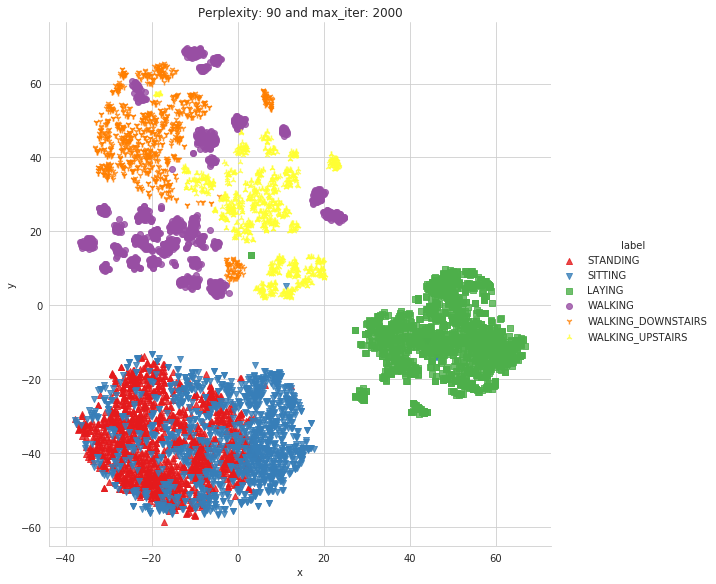

Done.


In [178]:
X_pre_tsne = train.drop(['subject', 'activity','activityName'], axis=1)
y_pre_tsne = train['activityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50,90],n_iter=2000)

### Obtain the train and test data

In [181]:
train = pd.read_csv('dataset/csv/train.csv')
test = pd.read_csv('dataset/csv/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [182]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,activity,activityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [183]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'activity', 'activityName'], axis=1)
y_train = train.activityName

In [184]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'activity', 'activityName'], axis=1)
y_test = test.activityName

In [185]:
print(f'X_train and y_train : ({X_train.shape},{y_train.shape})')
print(f'X_test  and y_test  : ({X_test.shape},{y_test.shape})')

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


## Model

In [186]:
# labels for confusion matrix plot
labels = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_downstairs', 'Walking_upstairs']

In [187]:
# Function to plot the Confusion Matrix

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm,  interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### Genereic Function to run any model specified

In [198]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, 
                  cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Blues):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training
    train_start_time = datetime.now()
    print("Training the model...")
    model.fit(X_train, y_train)
    print('Done.. \n \n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print(f"Training Time (HH:MM:SS.ms) - {results['training_time']} \n\n")
    
    # predict test data
    print("Now, Predicting Test data..")
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done.. \n')
    results['testing_time'] = test_end_time - test_start_time
    print(f"Testing Time (HH:MM:SS.ms) - {results['testing_time']}")
    
    # calculate the overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    
    # store accuracy in results
    results['accuracy'] = accuracy
    print("\n------ Accuracy ------")
    print(f"\n      {accuracy}")
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print("\n-------Confusion Matrix-------\n")
        print(f"   {cm}")
    
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, 
                         normalize=True, title="Normalized Confusion matrix", 
                         cmap=cm_cmap)
    plt.show()
    
    # get classification report
    print("------ Classification Report ------\n")
    classification_report = metrics.classification_report(y_test, y_pred)
    
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results

## Method to print the gridsearch Attributes

In [199]:
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print("---- Best Estimator -----")
    print(f"\n\t{model.best_estimator_}\n")
    
    # parameters that gave the best results while performing gridsearch
    print("----- Best parameters----")
    print(f'\tParameters of best estimator: \n\n\t{model.best_params_}')
    
    # number of cross validation splits
    print("---- No. of Cross Validation sets-----")
    print(f'\n Total number of cross validation sets \n: {model.n_splits_}')
    
    # Average cross validated score of the best estimator, from the Grid Search
    print("------ Best Score ------")
    print(f"\n Average Cross Validate scores of best estimator: \n\n\t{model.best_score_}\n")

# Model 1: Logistic Regression with Grid Search

In [200]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:   11.6s remaining:    8.3s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   24.5s finished


Done.. 
 

Training Time (HH:MM:SS.ms) - 0:00:28.800050 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:00.021039

------ Accuracy ------

      0.9586019681031558

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  15 517   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 402  14]
 [  0   0   0  25   1 445]]


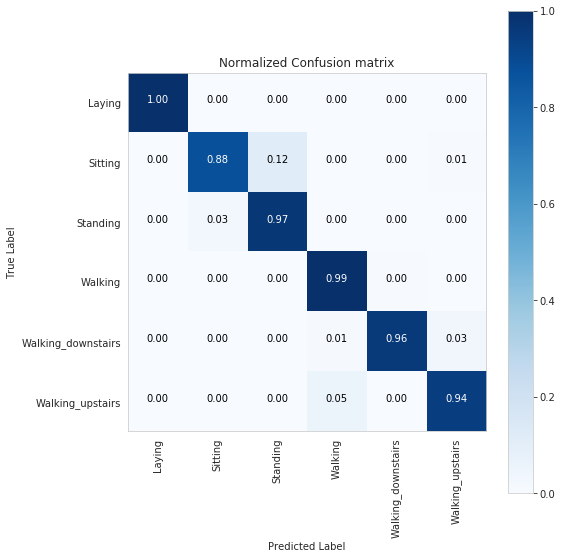

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [202]:
# Start Grid Search
parameters = {'C' : [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid = parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

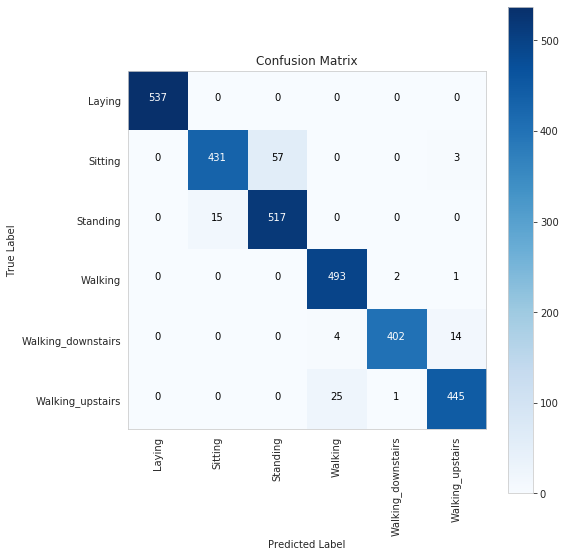

In [204]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Blues, )
plt.show()

In [205]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

---- Best Estimator -----

	LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

----- Best parameters----
	Parameters of best estimator: 

	{'C': 1, 'penalty': 'l2'}
---- No. of Cross Validation sets-----

 Total number of cross validation sets 
: 3
------ Best Score ------

 Average Cross Validate scores of best estimator: 

	0.9358015748118914



## 2. Linear SVC with GridSearch

In [206]:
from sklearn.svm import LinearSVC

Training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:  1.6min finished


Done.. 
 

Training Time (HH:MM:SS.ms) - 0:01:41.951053 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:00.008444

------ Accuracy ------

      0.9647098744485918

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  2 420  65   0   0   4]
 [  0   8 523   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


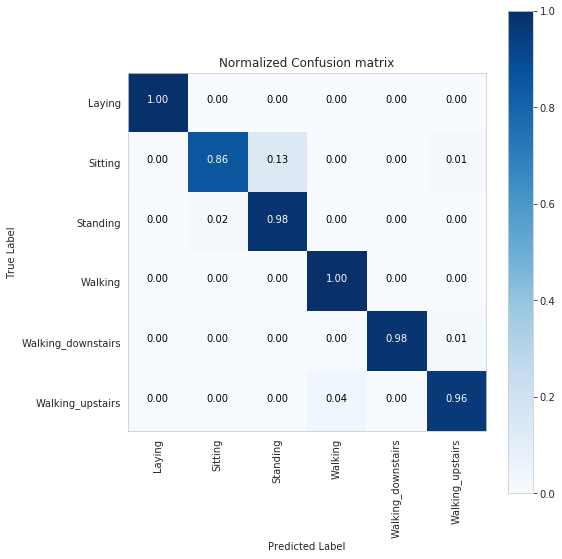

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.91       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.96      0.96      2947



In [207]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [208]:
print_grid_search_attributes(lr_svc_grid_results['model'])

---- Best Estimator -----

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

----- Best parameters----
	Parameters of best estimator: 

	{'C': 1}
---- No. of Cross Validation sets-----

 Total number of cross validation sets 
: 5
------ Best Score ------

 Average Cross Validate scores of best estimator: 

	0.9427442112126971



## 3.  Kernel SVM with GridSearch

Training the model...
Done.. 
 

Training Time (HH:MM:SS.ms) - 0:13:08.945309 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:03.304817

------ Accuracy ------

      0.9626739056667798

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


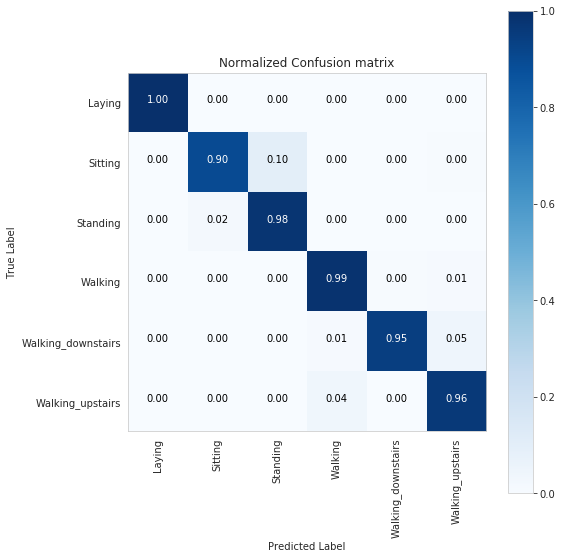

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [210]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## 4. Decision Trees with GridSearchCV


Training the model...
Done.. 
 

Training Time (HH:MM:SS.ms) - 0:00:21.839773 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:00.041998

------ Accuracy ------

      0.8747879199185612

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  0 370 121   0   0   0]
 [  0  60 472   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  21 352  47]
 [  0   0   0  61  34 376]]


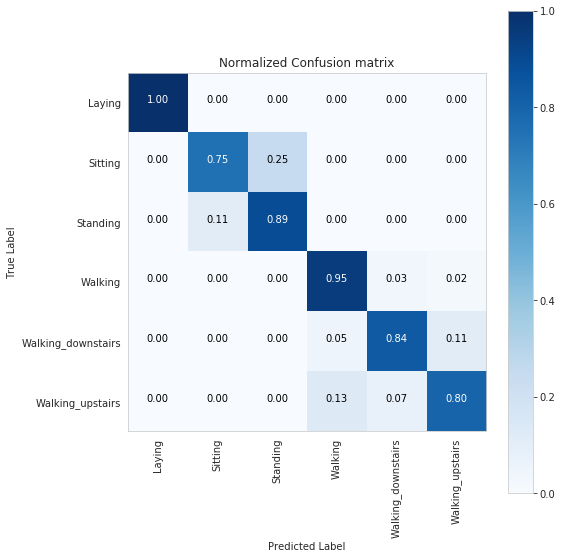

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.75      0.80       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.87      0.84      0.86       420
  WALKING_UPSTAIRS       0.87      0.80      0.83       471

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947

---- Best Estimator -----

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction

In [211]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

## 5. Random Forest Classifier with GridSearch


Training the model...
Done.. 
 

Training Time (HH:MM:SS.ms) - 0:15:09.992889 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:00.079656

------ Accuracy ------

      0.9246691550729556

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  0 439  52   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 479   9   8]
 [  0   0   0  20 353  47]
 [  0   0   0  38   7 426]]


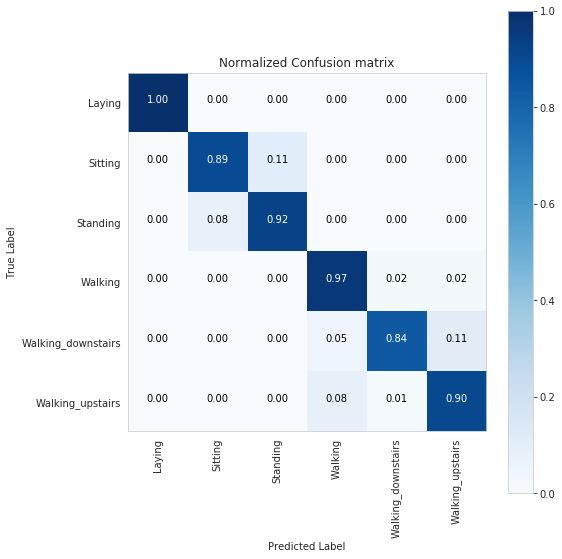

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.89      0.90      0.89       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

---- Best Estimator -----

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min

In [213]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

## 6.  Gradient Boosted Decision Trees With GridSearch

Training the model...
Done.. 
 

Training Time (HH:MM:SS.ms) - 5:09:02.732577 


Now, Predicting Test data..
Done.. 

Testing Time (HH:MM:SS.ms) - 0:00:00.507781

------ Accuracy ------

      0.9239904988123515

-------Confusion Matrix-------

   [[537   0   0   0   0   0]
 [  0 403  86   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 481   7   8]
 [  0   0   0   9 371  40]
 [  0   1   0  29   5 436]]


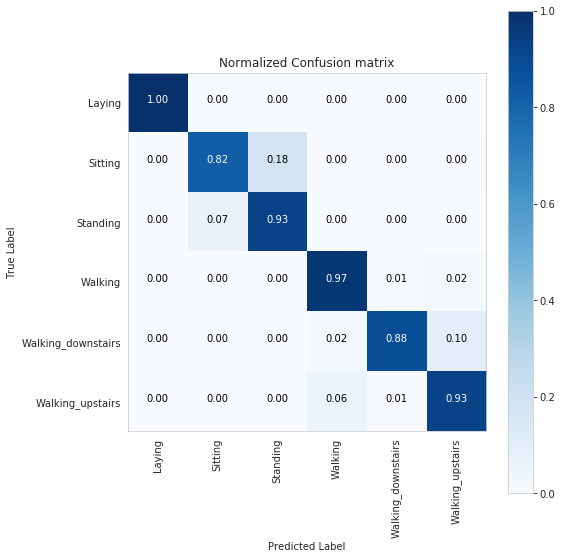

------ Classification Report ------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

---- Best Estimator -----

	GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

## 7. Comparing all models

In [215]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.86%       4.14%
Linear SVC          : 96.47%       3.529% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 87.48%      12.52% 
Random Forest       : 92.47%      7.533% 
GradientBoosting DT : 92.47%      7.533% 
